In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>3.93</h1>

Derivative Free Optimization: 

Finding the maximum/minimum through optimizing only the function. Begin with a single-variable function, starting point and step size which helps us define function values of left and right. Then, we need to evaluate how high/low both sides (left and right) of the function value at the given point. Step left/right and pick smaller/bigger point and then repeat until we find the function value fitted the tolerance.

<h1>3.94</h1>

Gradient Descent/Ascent Optimization Method:

Finding the minimum/maximum of a function by following the steepest path downward/upward. We need a function, its derivative, an initial guess, and a step size (one parameter). Since we have a single-variable function, its derivative tells us the slope of the function at the point, and the max/min will exists where the derivative is 0. Move the point upward/downward by $x_{i+1} = x_i + stepsize \times derivative$. Repeat the process until the new position make the function's derivative close enough to 0 with a given tolerance.

<h1>3.95</h1>

Monte Carlo Search Optimization Method:

It is like searching for finding a diamond by randomly digging holes in different locations. We need a given function, a search interval for a single-variable function, a shrink value, and the number of samples. Using the results of random searches with the sample number to see where we can dig next (find the biggest/smallest for max/min) and then shrinking the interval to make a more precise domain. Repeat until we find the extrema.

<h1>3.96</h1>

We can try to apply NumPy/SciPy/Least Square Optimization to fit the given data. We can adjust the parameters until the guessed function fits the data as closely as possible. Often trying different parameter combinations and then evaluating how well they fit the data by visualization. Then, choosing the most appropriate parameters based on minimizing the squared errors (squared difference between exact data points and function-approximated ones) how well the plot is fitted. 

<h1>3.106</h1>

In [2]:
def gradient_descent_max(f, df, x0, alpha, tol):
    x = x0
    while np.abs(df(x)) > tol:
        f_prime = df(x)
        x_new = x + alpha*f_prime
        x = x_new 
    return x, f(x)


def gradient_descent_min(f, df, x0, alpha, tol):
    x = x0
    while np.abs(df(x)) > tol:
        f_prime = df(x)   
        x_new = x - alpha*f_prime   
        x = x_new    
    return x, f(x)

<h2>a.</h2>

Applying the gradient descent method:
There are 2 local extremum that are closest to x=0.
The first one is x = 1.0230901872077292 with f(x) = 1.3419278194799602
The second one is x = -1.0230901872077292 with f(x) = -1.3419278194799602


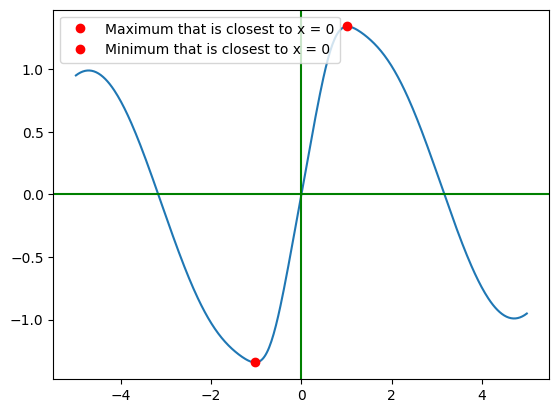

In [3]:
f = lambda x: x/(1+x**4) + np.sin(x)
df = lambda x: np.cos(x) +1/(1+x**4) - (4*x**4)/(x**4+1)**2


x_max, f_max = gradient_descent_max(f, df, 0, 0.01, 1e-10)
x_min, f_min = gradient_descent_min(f, df, 0, 0.01, 1e-10)
print("Applying the gradient descent method:")
print(f"There are 2 local extremum that are closest to x=0.\nThe first one is x = {x_max} with f(x) = {f_max}\nThe second one is x = {x_min} with f(x) = {f_min}")


x= np.linspace(-5, 5, 400)
plt.plot(x, f(x))
plt.axhline(color = "green")
plt.axvline(color="green")

plt.plot(x_max, f_max, "o", color = "red", label="Maximum that is closest to x = 0")
plt.plot(x_min, f_min, "o", color = "red", label="Minimum that is closest to x = 0")

plt.legend()
plt.show()

<h2>b.</h2>

Applying the gradient descent method:
There is one local extrema that is closest to x=0.
That is, x = 0.7376751806249076 with f(x) = 0.6627729779193128


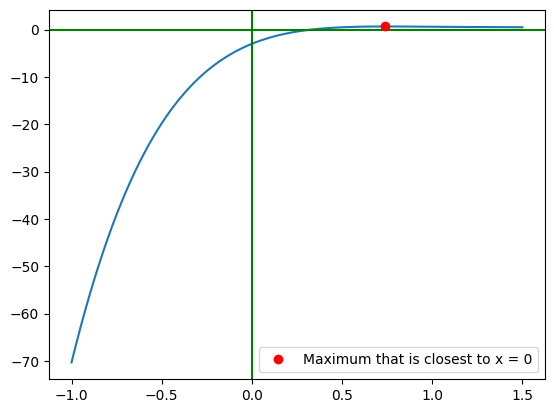

In [4]:
g = lambda x: (x-1)**3 * (x-2)**2 + np.exp(-0.5*x)
dg = lambda x: (-np.exp(-x/2))/2 + x*(x-2)*(x-1)**3 + 3*(x-2)**2 *(x-1)**2


x_max, g_max = gradient_descent_max(g, dg, 0, 0.01, 1e-10)
print("Applying the gradient descent method:")
print(f"There is one local extrema that is closest to x=0.\nThat is, x = {x_max} with f(x) = {g_max}")


x= np.linspace(-1, 1.5, 400)
plt.plot(x, g(x))
plt.axhline(color = "green")
plt.axvline(color = "green")

plt.plot(x_max, g_max, "o", color = "red", label="Maximum that is closest to x = 0")

plt.legend()
plt.show()

<h1>3.109</h1>

In [6]:
import scipy as sp  

# find the intersection points' values depend on r 
def intersection(r):

    # fence circle function
    def circle_fence(x, y):
        return x**2 + (y-1)**2 -1**2

    # goat circle with chain length of r (radius)
    def circle_goat(x, y):
        return x**2 + y**2 -r**2

    # apply x and y values for the previous 2 functions, and then return their function values
    def equation(x_y_value):
        x, y = x_y_value
        return circle_fence(x,y), circle_goat(x, y)

    # initial guesses of x, y values for circle functions, y is always positive
    # the first one for the point A in the second quadrant (-, +)
    # the second one for the point B in the first quadrant (+, +)
    initial = (-r, r), (r, r)
    
    # apply root-finding function
    point_A = sp.optimize.fsolve(equation, initial[0])
    point_B = sp.optimize.fsolve(equation, initial[1])
    
    return point_A, point_B


half_fence_area = np.pi/2

    
# find the curves of 2 circles
def fence_curve(x,r):
    return -np.sqrt(1- x**2) + 1 #convex part of fence circle

def goat_curve(x, r):
    return np.sqrt(r**2 - x**2) #concave part of gaze circle

def difference(r):
    fence = sp.integrate.quad(fence_curve, -np.sqrt(4 - (r**2 - 2)**2)/2, np.sqrt(4 - (r**2 - 2)**2)/2, args=(r,))
    gaze = sp.integrate.quad(goat_curve, -np.sqrt(4 - (r**2 - 2)**2)/2, np.sqrt(4 - (r**2 - 2)**2)/2, args=(r,))
    
    return gaze[0] -fence[0] - half_fence_area

r_value = sp.optimize.fsolve(difference, 1)[0]
print("The radius is found as", r_value)


r = r_value
point_A, point_B = intersection(r)
print("Two intersections are given as:", point_A, point_B)

The radius is found as 1.1587284730181249
Two intersections are given as: [-0.94444338  0.67132584] [0.94444338 0.67132584]


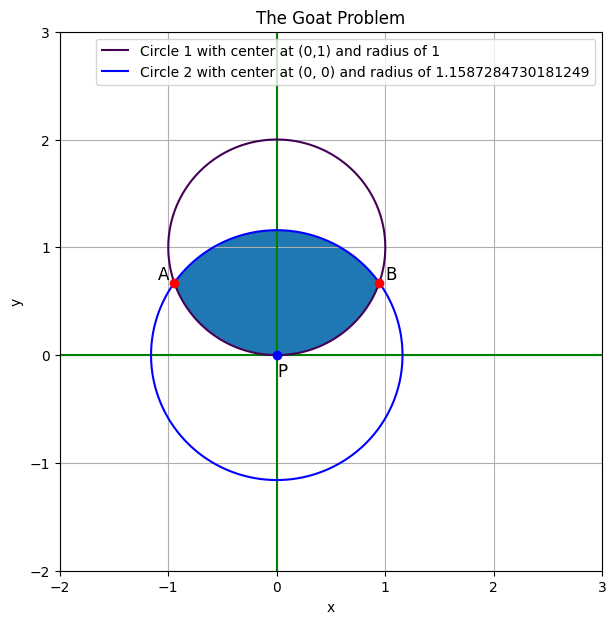

In [7]:
# find the curves of 2 circles
def fence_curve(x):
    return -np.sqrt(1- x**2) + 1 #convex part

def goat_curve(x, r):
    return np.sqrt(r**2 - x**2) #concave part

plt.figure(figsize=(7,7))
plt.grid(True)
plt.axhline(color = 'green')
plt.axvline(color='green')

# set up circle graph
x = np.linspace(-2, 3, 400)
y = np.linspace(-2, 3, 400)
a, b = np.meshgrid(x, y)

# plot circle fence
circle_1 = a**2 + (b-1)**2 - 1
c1 = plt.contour(a, b, circle_1, levels = [0])

# plot circles
r = r_value
c2 = plt.contour(a, b, a**2 + b**2 - r_value**2, levels=[0], colors = "blue")


a, b = point_A[0], point_B[0]
y = point_A[1]
# plot intersections
point_A = plt.plot(a, y, "o", color = 'red')
plt.text(-1.1, .7, "A", fontsize=12)

point_B = plt.plot(b, y, "o", color = 'red')
plt.text(1, .7, "B", fontsize=12)


point_p = plt.plot(0, 0, 'o', color="blue")
plt.text(0.01,-0.2, "P", fontsize=12)

x= np.linspace(a, b,400)
r = r_value
plt.fill_between(x, fence_curve(x), goat_curve(x, r))

# add legend and title
h1, l1 = c1.legend_elements()
h2, l2 = c2.legend_elements()
plt.legend([h1[0], h2[0]], ['Circle 1 with center at (0,1) and radius of 1', f"Circle 2 with center at (0, 0) and radius of {r_value}"])
plt.title("The Goat Problem")
plt.xlabel("x")
plt.ylabel("y")
plt.show()